## Setup

In [1]:
%pylab inline
from spring_helper import *
from doublet_detector import *
from collections import defaultdict

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

# Download data

In [3]:
# Download raw data by navigating to the following URL in your web browser:
# http://cf.10xgenomics.com/samples/cell-exp/2.1.0/pbmc8k/pbmc8k_filtered_gene_bc_matrices.tar.gz

# Or use wget
!wget http://cf.10xgenomics.com/samples/cell-exp/2.1.0/pbmc4k/pbmc4k_filtered_gene_bc_matrices.tar.gz

'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [4]:

# Uncompress 
!tar xfz pbmc4k_filtered_gene_bc_matrices.tar.gz

tar: Error opening archive: Failed to open 'pbmc4k_filtered_gene_bc_matrices.tar.gz'


## Load data

In [3]:
input_path = 'filtered_gene_bc_matrices/GRCh38/'

In [4]:
if os.path.isfile(input_path + '/matrix.npz'):
    E = scipy.sparse.load_npz(input_path + '/matrix.npz')
else:
    E = scipy.io.mmread(input_path + '/matrix.mtx').T.tocsc()
    scipy.sparse.save_npz(input_path + '/matrix.npz', E, compressed=True)

print E.shape

(4340, 33694)


In [5]:
gene_list = np.array(load_genes(input_path + 'genes.tsv', delimiter='\t', column=1))


In [6]:
total_counts = E.sum(1).A.squeeze()

In [7]:
E = tot_counts_norm(E)[0]

## Save base directory files

In [8]:
# Set path for saving data -- you'll have to change this for your own setup.
# This path should be a subdirectory of your local copy of SPRING,
# specifically, {path_to_SPRING}/datasets/{main_dataset_name}. 
# See example below, where springViewer_1_6_dev.html is located in ../

main_spring_dir = '../datasets/pbmc4k/'

if not os.path.exists(main_spring_dir):
    os.makedirs(main_spring_dir)
    


In [9]:
np.savetxt(main_spring_dir + 'genes.txt', gene_list, fmt='%s')
np.savetxt(main_spring_dir + 'total_counts.txt', total_counts)

In [10]:
# save master expression matrices

print 'Saving hdf5 file for fast gene loading...'
save_hdf5_genes(E, gene_list, main_spring_dir + 'counts_norm_sparse_genes.hdf5')

##############
print 'Saving hdf5 file for fast cell loading...'
save_hdf5_cells(E, main_spring_dir + 'counts_norm_sparse_cells.hdf5')

##############
save_sparse_npz(E, main_spring_dir + 'counts_norm.npz', compressed = False)


Saving hdf5 file for fast gene loading...
Saving hdf5 file for fast cell loading...


## Save SPRING files

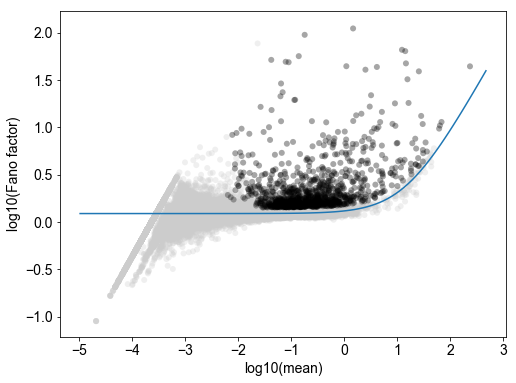

TypeError: 1386 is not JSON serializable

In [14]:

t0 = time.time()

save_path = main_spring_dir + 'full'

out = make_spring_subplot(E, gene_list, save_path, 
                    normalize = False, tot_counts_final = total_counts,
                    min_counts = 3, min_cells = 3, min_vscore_pctl = 85,show_vscore_plot = True, 
                    num_pc = 30, 
                    k_neigh = 4, 
                    num_force_iter = 500)

np.save(save_path + '/cell_filter.npy', np.arange(E.shape[0]))
np.savetxt(save_path + '/cell_filter.txt',  np.arange(E.shape[0]), fmt='%i')

print 'Finished in %i seconds' %(time.time() - t0)
